## Lab 9: Hierarchical and Spectral Clustering
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

# Exercise 1
Use the ```iris``` dataset available at [this link](https://archive.ics.uci.edu/dataset/53/iris).
- Apply **your own** PCA function to the dataset. Plot the data in two dimensions, coloring by class.

In [25]:
iris = pd.read_csv("../Datasets/iris.data", sep=",", header=None, names = ["sepal_lenght", "sepal_width", "petal_lenght", "petal_width", "class"])

# Attribute Information:
# 0. sepal length in cm
# 1. sepal width in cm
# 2. petal length in cm
# 3. petal width in cm
# 4. class: 
#     -- Iris Setosa
#     -- Iris Versicolour
#     -- Iris Virginica


In [26]:
print(iris.shape)
print(iris)

(150, 5)
     sepal_lenght  sepal_width  petal_lenght  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [27]:
label = iris["class"]
X = iris.drop("class", axis=1)

In [28]:
encoder = OrdinalEncoder()
y=np.array(label)
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1,1))

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

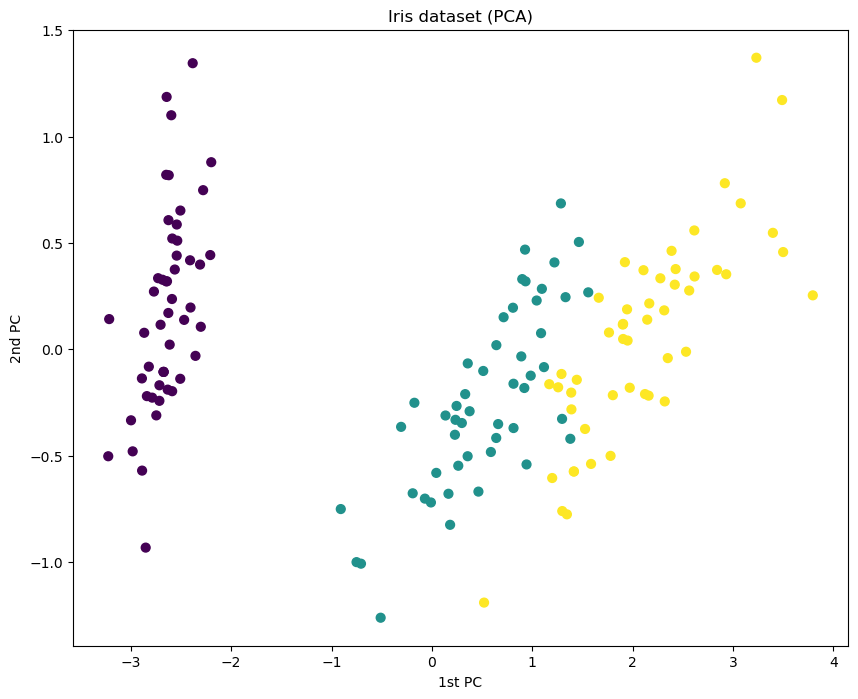

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(X_new[:,0], X_new[:,1], c=y, s = 40)
plt.title("Iris dataset (PCA)")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

- Perform hierarchical clustering with single linkage and Ward's linkage using [```scipy``` functions](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [33]:
Z_s = linkage(X, 'single')
Z_s[:5] #[idx1, idx2, dist, sample_count]

array([[9.00e+00, 3.40e+01, 0.00e+00, 2.00e+00],
       [3.70e+01, 1.50e+02, 0.00e+00, 3.00e+00],
       [1.01e+02, 1.42e+02, 0.00e+00, 2.00e+00],
       [7.00e+00, 3.90e+01, 1.00e-01, 2.00e+00],
       [0.00e+00, 1.70e+01, 1.00e-01, 2.00e+00]])

In [34]:
Z_w = linkage(X, 'ward')
Z_w[:5] #[idx1, idx2, dist, sample_count]

array([[9.00e+00, 3.40e+01, 0.00e+00, 2.00e+00],
       [3.70e+01, 1.50e+02, 0.00e+00, 3.00e+00],
       [1.01e+02, 1.42e+02, 0.00e+00, 2.00e+00],
       [7.00e+00, 3.90e+01, 1.00e-01, 2.00e+00],
       [0.00e+00, 1.70e+01, 1.00e-01, 2.00e+00]])

- Plot the dendogram and the datapoints in 2D, coloring now by cluster (cut the dendogram to have the same number of clusters of the ground truth). 

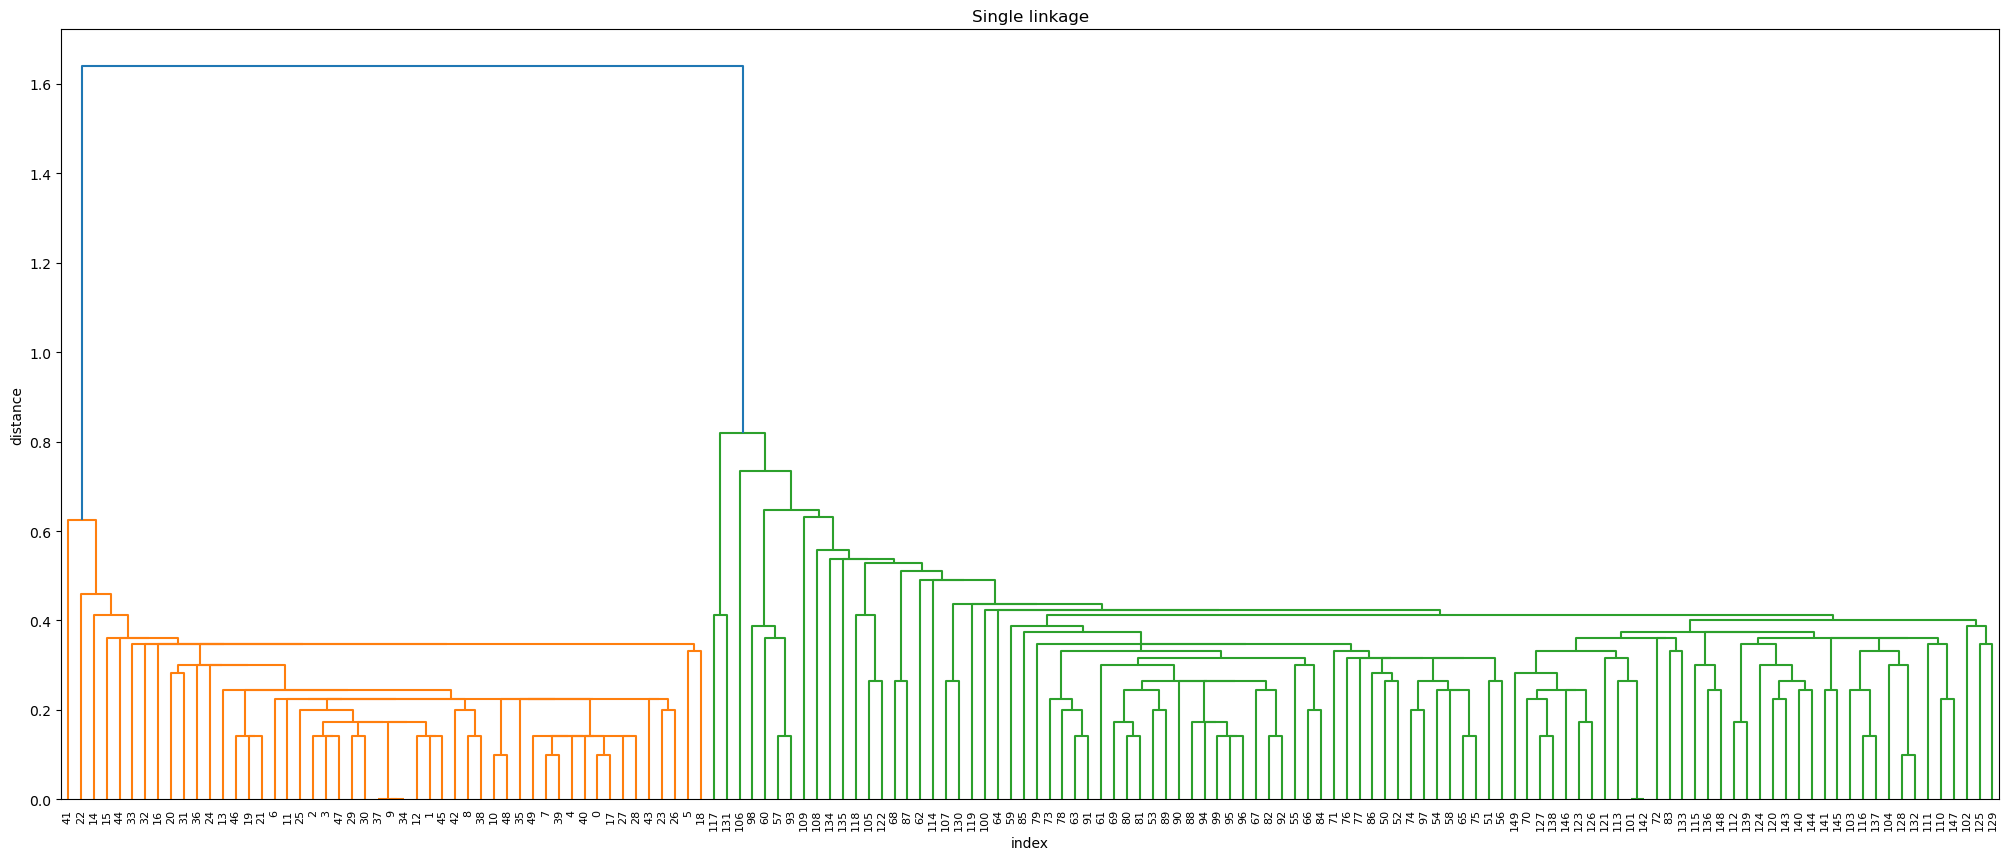

In [35]:
plt.figure(figsize=(25, 10))
plt.title('Single linkage')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(Z_s, leaf_rotation=90.,leaf_font_size=8.)
plt.show()

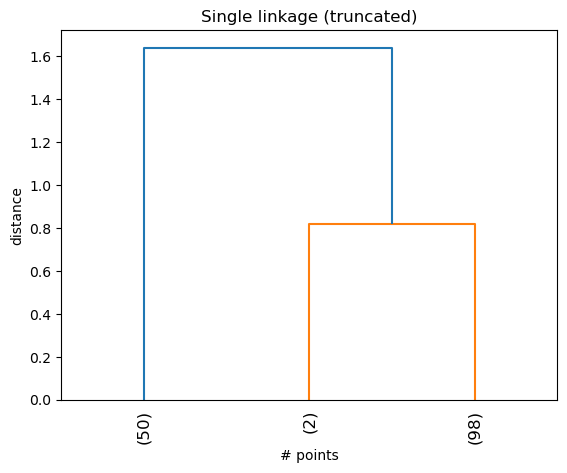

In [36]:
plt.title('Single linkage (truncated)')
plt.xlabel('# points')
plt.ylabel('distance')
dendrogram(Z_s, truncate_mode='lastp', p=3, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12.)
plt.show()

In [37]:
clusters = cut_tree(Z_s, n_clusters=3)
clusters

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

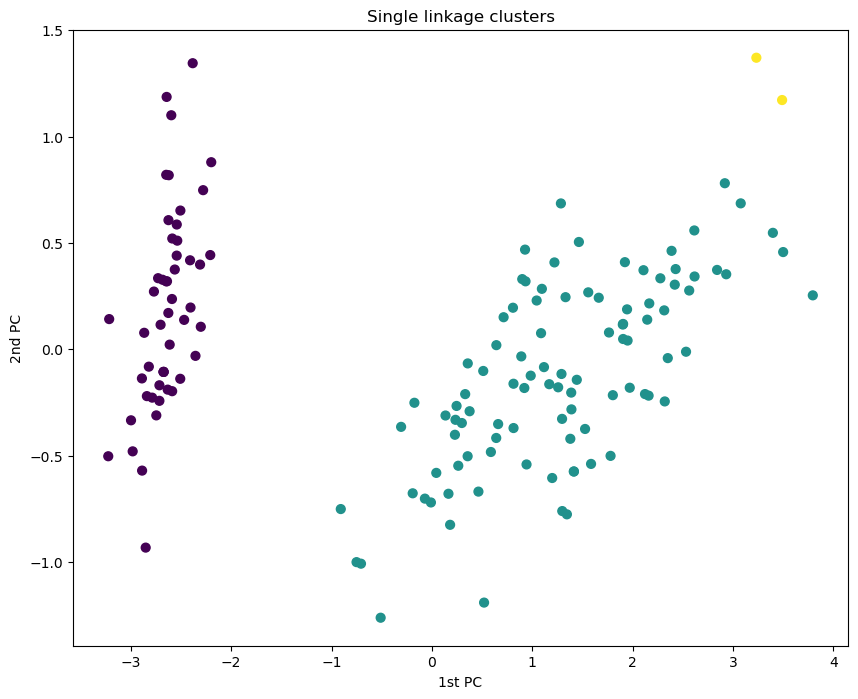

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(X_new[:,0], X_new[:,1], c=clusters, s = 40)
plt.title("Single linkage clusters")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

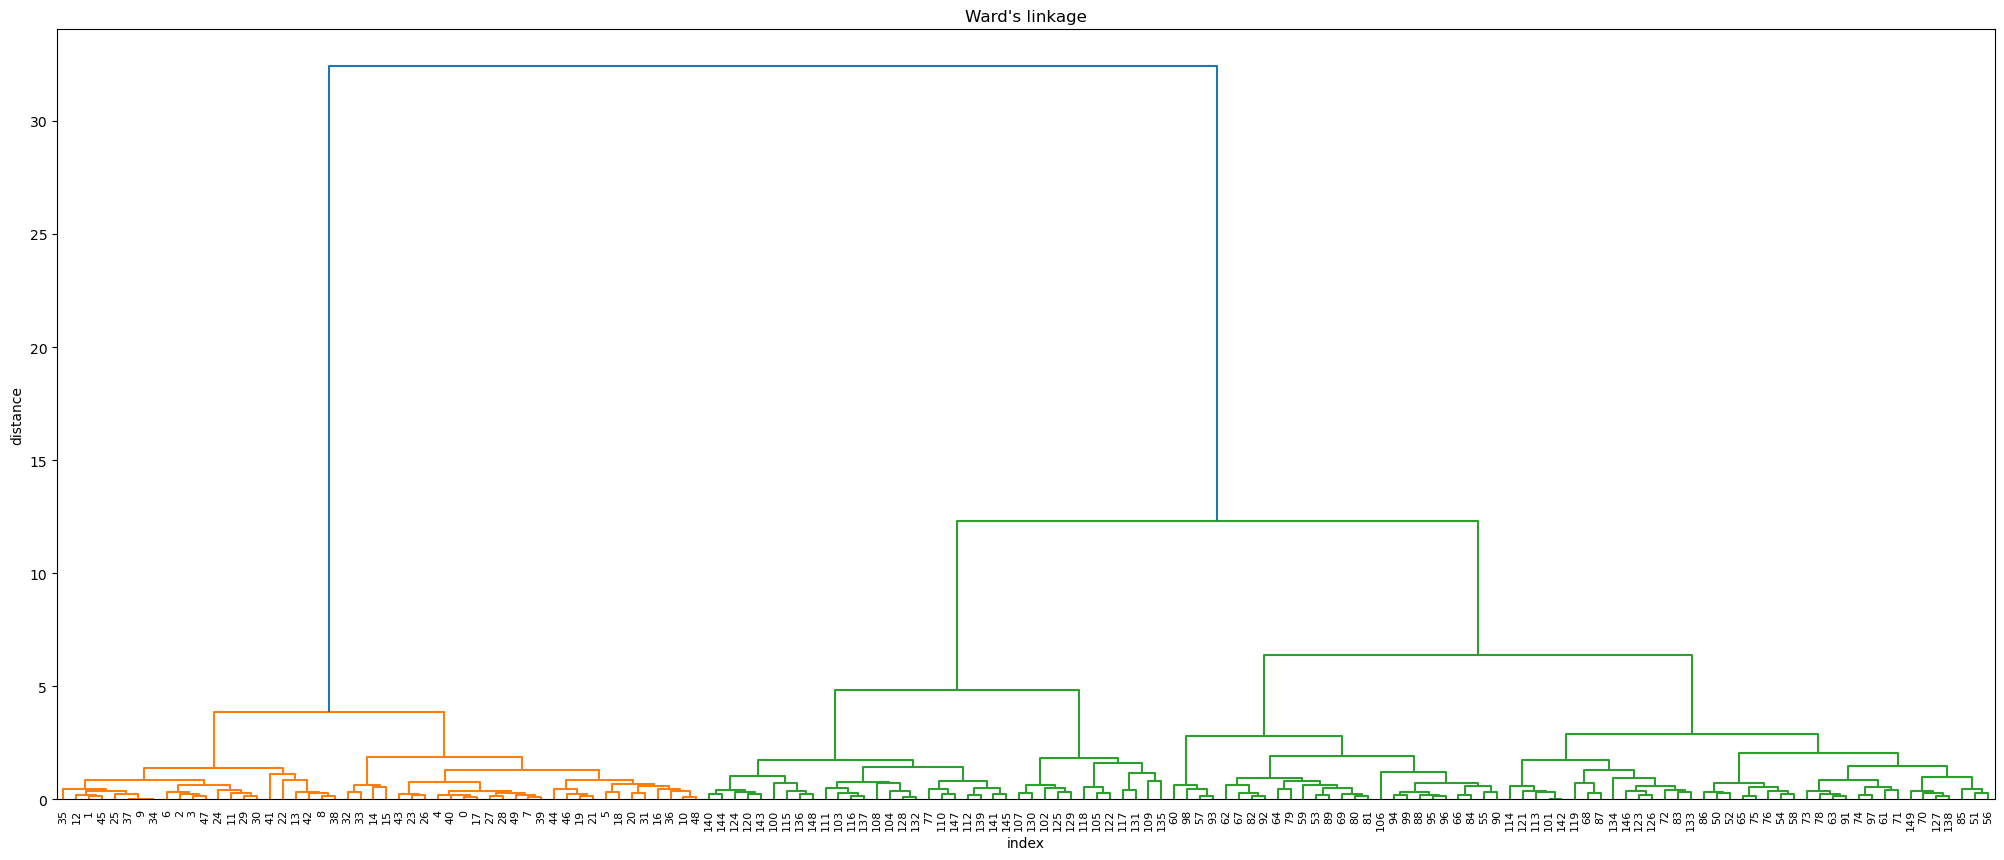

In [39]:
plt.figure(figsize=(25,10))
plt.title('Ward\'s linkage')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(Z_w,leaf_rotation=90.,leaf_font_size=8.)
plt.show()

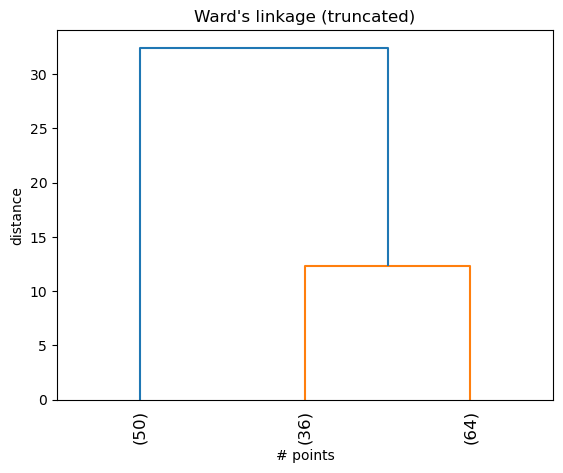

In [40]:
plt.title('Ward\'s linkage (truncated)')
plt.xlabel('# points')
plt.ylabel('distance')
dendrogram(Z_w, truncate_mode='lastp', p=3, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12.)
plt.show()

In [41]:
clusters = cut_tree(Z_w, n_clusters=3)
clusters

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
    

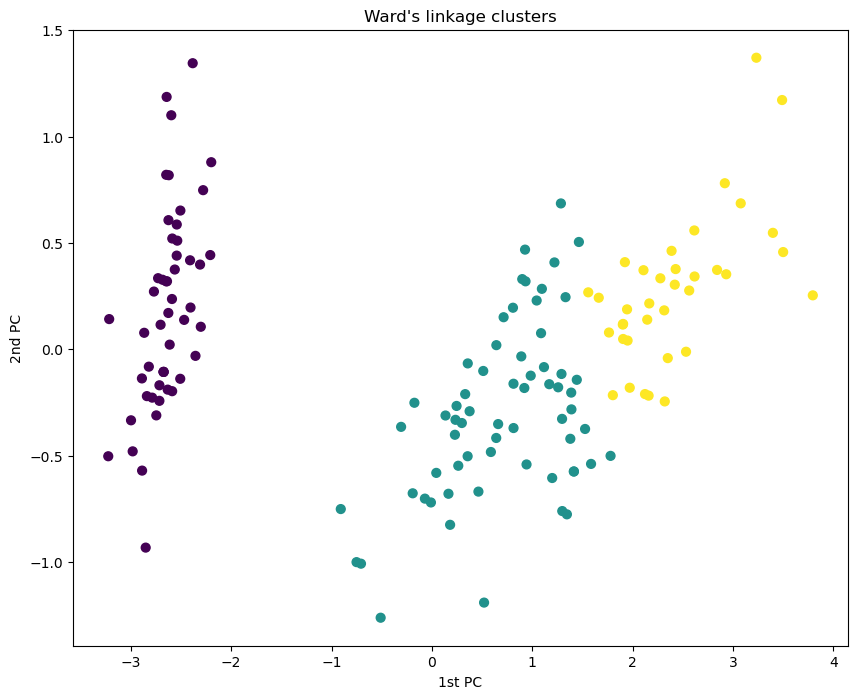

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(X_new[:,0], X_new[:,1], c=clusters, s = 40)
plt.title("Ward\'s linkage clusters")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

- Implement your own version of spectral clustering 
- Apply it to the dataset, setting $k_C$ to be the same of the ground truth (build the graph with $k$-NN having $k_{NN}=5$). Plot the dataspoints in 2D, coloring by cluster.

In [43]:
from sklearn.cluster import SpectralClustering

In [44]:
sc = SpectralClustering(n_clusters=3, #k_c
                        affinity='nearest_neighbors', 
                        n_neighbors=5) #k_nn
sc.fit(X)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3, n_neighbors=5)

In [45]:
clusters = sc.labels_

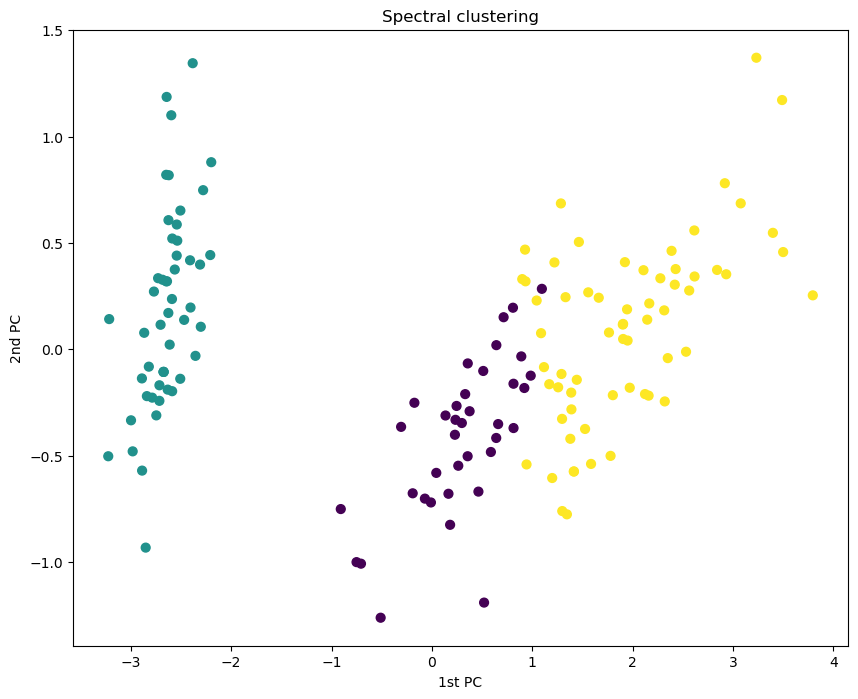

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(X_new[:,0], X_new[:,1], c=clusters, s = 40)
plt.title("Spectral clustering")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()